In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, cos
from qu_eig import *

In [2]:
#----- Initializing Parameters
n = 100 # Size of Truncated Hilbert Spaces
##Frequencies in GHz
omega_c = 2*np.pi * 9.07
delta   = 2*np.pi * -1.0
g       = 2*np.pi * 0.2
kappa   = 2*np.pi * 0.001
## Derived Quantities
chi = g**2/delta
xi1 = kappa/sqrt(2)
## Generating time points for simulation

In [3]:
#----- Setting up Operators and Hamiltonians
## Operators
I = identity(n)
a = destroy(n)
sz = -1.*I

##N = a.dag()*a + sz/2 + 1./2
N = dag(a).dot(a)
D = np.sqrt((delta**2)*I + (4*g**2)*N)

## Hamiltonians
H0 = omega_c*(dag(a).dot(a)) + (omega_c*I-D).dot(sz/2)

H1 = a + dag(a)
def H1_coeff(t, args):
    xi = args['xi']
    omega_d = args['omega_d']
    return xi*np.cos(omega_d*t)/sqrt(2)

H = [H0, [H1, H1_coeff]]

In [4]:
#----- Setting up parameters for simulation
## Detuning
d = 0.7
omega_d = d*abs(chi) + omega_c

## Drive Amplitude
xi = 6.3*xi1

## Setting up Expectation and Collapse Operators
e_op = a
c_op = sqrt(kappa)*a

## Setting up additional parameters for solver
cyclePeriod = 2*np.pi/omega_d
cycleRes = 300
cycleCount = 10
ntraj = 100
H_args = {'xi':xi, 'omega_d':omega_d}

## Creating initial state
psi0 = fock(n, 0)

In [5]:
%time data = rk4Solve(H, psi0, cyclePeriod, cycleRes, cycleCount,\
                     c_op, e_op, [H_args], ntraj)
np.save('plotTestRK4_data.npy', data)

Running Simulation
Total Progress: 100.0%
Complete
CPU times: user 39.7 s, sys: 579 ms, total: 40.3 s
Wall time: 10.1 s


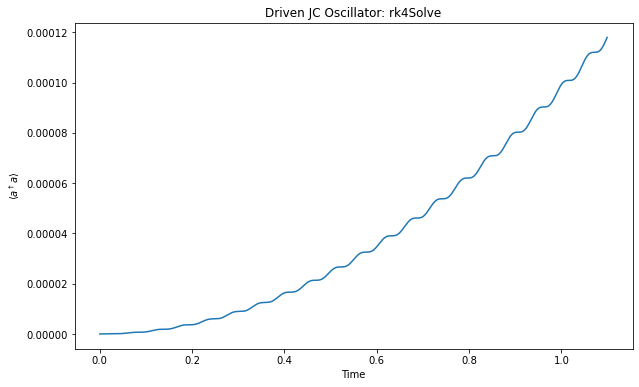

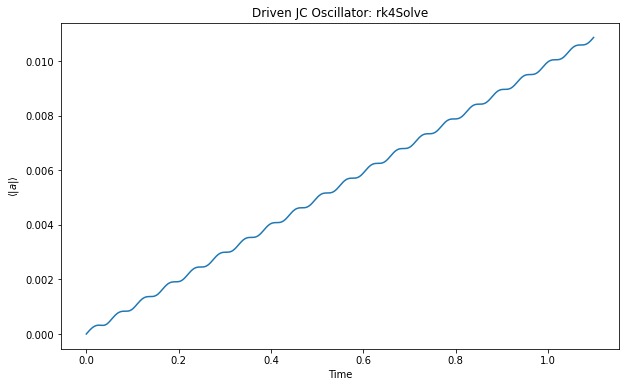

In [6]:
fig = plt.figure(figsize=(10,6))
plt.title('Driven JC Oscillator: rk4Solve')
plt.xlabel('Time')
plt.ylabel(r'$\langle a^\dagger a\rangle$')
plt.plot(data[:,0], data[:,1])
plt.show()

fig = plt.figure(figsize=(10,6))
plt.title('Driven JC Oscillator: rk4Solve')
plt.xlabel('Time')
plt.ylabel(r'$\langle \|a\|\rangle$')
plt.plot(data[:,0], data[:,2])
plt.show()